*Ebersohn L*

*18285229*

### Semester Test 2 MKM321 Full marks [45], Total marks [45]

### The University of Pretoria commits itself to produce academic work of integrity. I affirm that I am aware of and have read the Rules and Policies of the University, more specifically the Disciplinary Procedure and the Tests and Examinations Rules, which prohibit any unethical, dishonest or improper conduct during tests, assignments, examinations and/or any other forms of assessment. I am aware that no student or any other person may assist or attempt to assist another student, or obtain help, or attempt to obtain help from another student or any other person during tests, assessments, assignments, examinations and/or any other forms of assessment.

### Rename the Notebook to (your student number).ipynb.

### Add your name and student number at the top of the notebook as indicated. 


### Access: You must have access to Anaconda Python 3.7 or later with Jupyter Notebook support. Make sure you can run all the tutorial memoranda. Prescribed Textbook and all ClickUP material.

### Test Duration: 90 minutes

### Time to Upload the Notebook to the Assignment and Fill-in the ClickUP Test: 15 minutes

### Total Duration: 105 minutes. Make sure you upload first then complete the ClikcUP Test.

### You are only allowed unlimited upload attempts only during the allowed time for the test. 


# Question 1 **[15]** - Multiple choice to be answered as ClickUP Test

### 1.1 Given a 15-noded triangular 2D element. What is the dimensionality of the element stiffness matrix?: [3]

### a) $60\times 60$
### b) $45\times 45$
### c) $30\times 30$
### d) $15\times 15$
### e) None of the above

In [ ]:
#c

### 1.2 Consider a structure modelled by a two-noded linear element.  Node 1 (x = 0) and Node 2 (x = 40cm). A load of $F=0.25$ kN is applied at Node 1, and $F=-0.25$ kN at Node 2. The displacement of Node 1 is computed as 0.4cm and the displacement of Node 2 as 0cm. What is the work done by the applied loads? [3]


### a) 0.25 J
### b) 0.5 J
### c) 1.0 J
### d) 2.0 J
### e) None of the above

In [2]:
#b

### 1.3 Consider a structure modelled by a three-noded quadratic finite element. Node 1 (x = 0mm), Node 2 (x = 50mm) and Node 3 (100 mm). Node 1 is constrained from translating. A load of -6 kN is applied to Node 2, and a load of 3 kN is applied to Node 3. What is the exact reaction force at Node 1 resulting from the static finite element solution? 
### a) -3 kN
### b) 3 kN
### c) -9 kN
### d) 9 kN
### e) None of the above / Equilibrium is only approximately satisfied, no exact answer can be given.

In [3]:
#b

### 1.4 Consider a nine-noded fully integrated 2D element. How many non-zero eigenvalues does the unconstrained finite element stiffness matrix have? [3]


### a) 15
### b) 12
### c) 9
### d) 6
### e) None of the above

In [ ]:
d

### 1.5  Consider a structure modelled by a three-noded quadratic finite element. Node 1 (x = 0mm), Node 2 (x = 50mm) and Node 3 (100 mm). What is the value of $\xi$ in the local coordinate given $x=0.1$m: **[3]**
### a) -1
### b) -0.5
### c) 0.5
### d) 1
### e) None of the above

In [ ]:
#d

# Question 2 [15]
------------------------------------------
### Consider a beam of length L=2000mm, the rectangular beam cross section has a height of $200$mm and width of $10$mm.
### A plane stress analysis can be assumed to be appropriate.
### The bar has a Young's modulus of $E=210$ GPa and Poisson's ratio of $\nu = 0.3$.
### A distributed load of  $q = 1250$ N/m (in the negative y-direction) is applied on the top surface of element 8.
### The left edge of the beam is  clamped.
### Consider the case $a=1500mm$ and $b=500mm$.

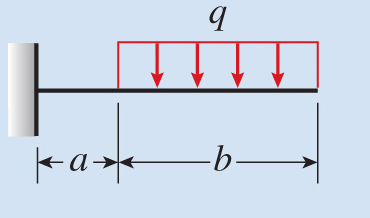

In [11]:
# from IPython.display import Image
Image(filename="q1_beam.png",embed=True)

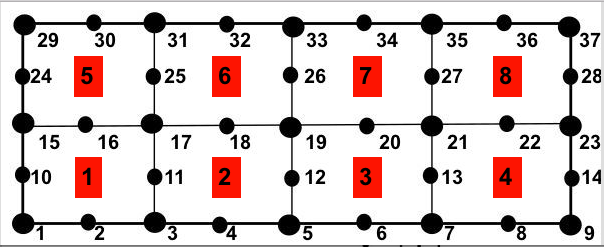

In [13]:
# from IPython.display import Image
Image(filename="q1_mesh.png",embed=True)

### 2.1 Modify the input file beamq2.inp with mesh (as shown below) to model the given problem. Complete the Input Cards (*KEYWORD) listed below that would model the correct material, elements and geometry for the given mesh [5]

*ELTYPE
2
*EMODULUS
210000.0
*POISSON
0.3
*THICKNESS
10.0

### 2.2 Modify the input file beamq2.inp with mesh (as shown below) to model the given problem. Complete the Input Cards (*KEYWORD) listed below that would model the correct displacement boundary conditions and loading for the given mesh [5]

*BOUNDARY
1 1 0
1 2 0
10 1 0
10 2 0
15 1 0
15 2 0
24 1 0
24 2 0
29 1 0
29 2 0
*CLOAD
35 2 -104.66666
36 2 -416.66666
37 2 -104.66666

### 2.3. Solve the problem and verify the obtained solution with a hand-calc [5]

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0256 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0092 seconds.
Done post-processing stress:   0.0040 seconds.
Done writing output        :   0.0020 seconds.


<IPython.core.display.Javascript object>


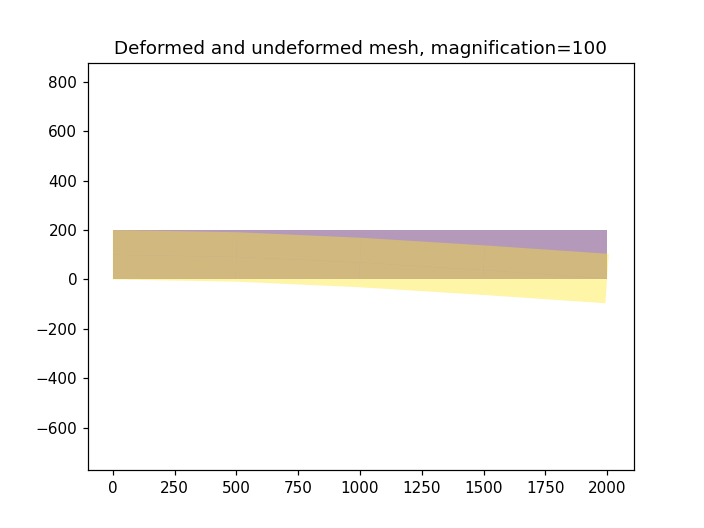

<IPython.core.display.Javascript object>


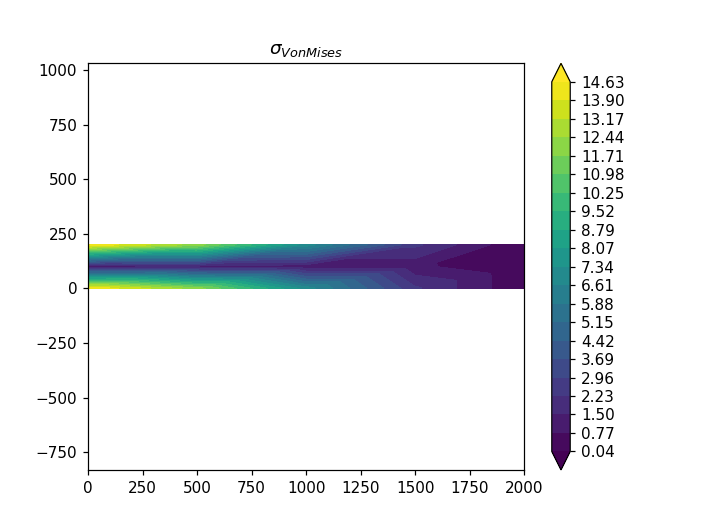

<IPython.core.display.Javascript object>


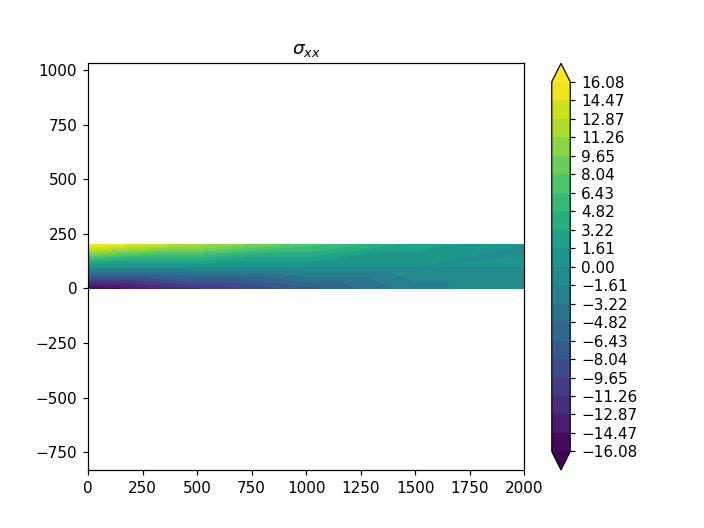

<IPython.core.display.Javascript object>


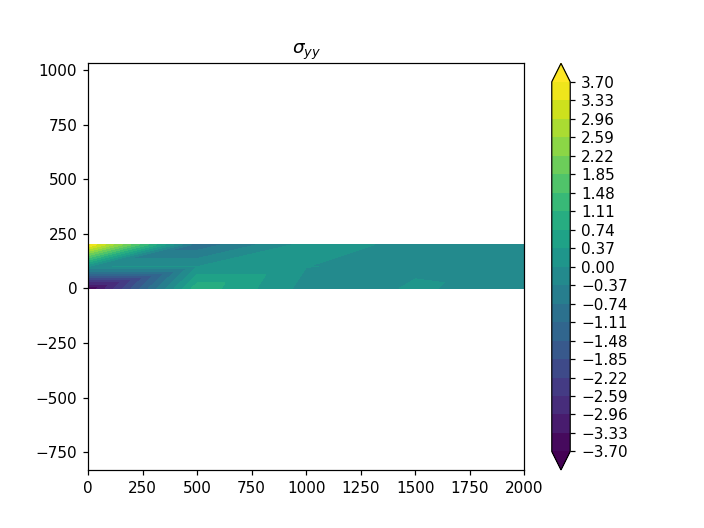

<IPython.core.display.Javascript object>


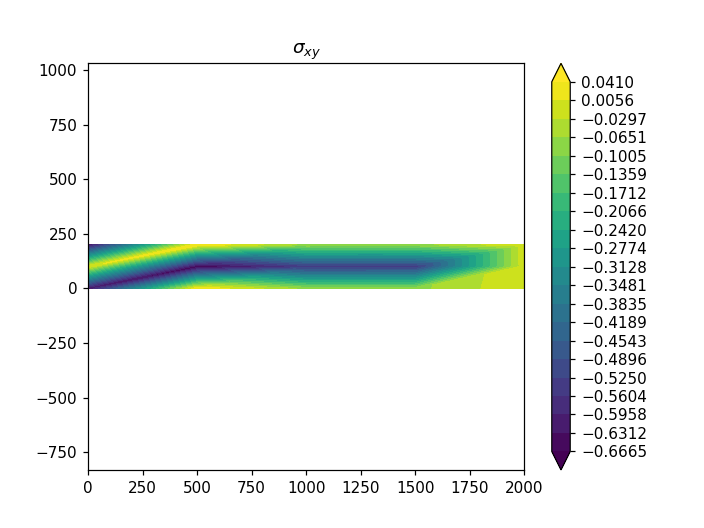

In [4]:
from fem_main_program import launch_fem
%matplotlib notebook
U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('beamq2',MagFac=100)

In [19]:
##verifying the reaction forces
#forces must balance

Fapplied = -1250*0.5
Freactionx = ReactionForces[0]+ReactionForces[2]+ReactionForces[4]+ReactionForces[6]+ReactionForces[8]
Freactiony = ReactionForces[1]+ReactionForces[3]+ReactionForces[5]+ReactionForces[7]+ReactionForces[9]
print('reaction in the x directoin should be 0N')
print(Freactionx)
print('condition verified')
print('reaction in the y directoin should be equal and opposite to -q*0.5m')
print('Force applied:')
print(Fapplied,'[N]')
print('Force reaction:')
print(Freactiony,'[N]')
print('delta:')
print(Freactiony+Fapplied,'[N]')
print('This is close but can be better.Considdering how the nodes at the left is constraint.')

reaction in the x directoin should be 0N
[[-1.67347025e-10]]
condition verified
reaction in the y directoin should be equal and opposite to -q*0.5m
Force applied:
-625.0 [N]
Force reaction:
[[625.99998001]] [N]
delta:
[[0.99998001]] [N]
This is close but can be better.Considdering how the nodes at the left is constraint.


In [49]:
#verifying Normal stress at a distance at the mounting :
import numpy as np
AppliedM0 = (-104.66666 * 1.5)+(-416.66666 * 1.75)+(-104.66666 * 2)#Nm
AppliedM500 = (-104.66666 * 1)+(-416.66666 * 1.25)+(-104.66666 * 1.5)
print(AppliedM0,'[Nm]')
h = 0.2
b = 0.01

I =(b*h**3)/12
verify_sigma0 = 0.000001*(-AppliedM0*0.1)/(I)
verify_sigma500 = 0.000001*(-AppliedM500*0.1)/(I)

print('Expected sigmas at root nodes and at x=500mm:')
print(verify_sigma0,'[MPa]')
print(verify_sigma500,'[MPa]')
print('FEM sigmas at root nodes and at x=500mm:')
print(np.array(SXX)[4][3],'[MPa]')
print(np.array(SXX)[5][3],'[MPa]')
print('Both nodes was checked to eliminate the effect of the boundary conditions.')
print('As expected the node at x = 500mm was more accurate.')
print('Stresses are verified.')

-1095.499965 [Nm]
Expected sigmas at root nodes and at x=500mm:
16.432499474999997 [MPa]
11.737499624999998 [MPa]
FEM sigmas at root nodes and at x=500mm:
16.081597971733988 [MPa]
10.81424847374219 [MPa]
Both nodes was checked to eliminate the effect of the boundary conditions.
As expected the node at x = 500mm was more accurate.
Stresses are verified.


In [ ]:
print('This fem is mostly accurate.The ')